In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np


In [95]:
def cc():
    return pd.read_csv('CreditCardFraud/creditcard.csv')

In [96]:
cc().head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [97]:
# First, let's clean the data
# Let's remove all amounts = 0

def nz():
    return cc()[cc().Amount > 0]
df = nz()

In [98]:
# Let's try to explore if the dataset is imbalanced
non_frauds = nz()[nz().Class == 0].count().Time
frauds = nz()[nz().Class == 1].count().Time
(frauds, non_frauds)

(465, 282517)

In [99]:
# Feature extraction
X = df.iloc[:, 0:30]
y = df.Class

# The dataset is imbalanced. Let's try to apply the following techniques to fix these imbalances.
# Here, we use oversampling
smote = SMOTE(random_state=42)
X, y=smote.fit_resample(X, y)

In [100]:
ctrx = 0
ctry = 0
for x in y:
    if x == 0:
        ctrx+=1
    else:
        ctry+=1
print(ctrx, ctry)

282517 282517


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.060889
         Iterations 16


In [103]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               452027
Model:                          Logit   Df Residuals:                   451996
Method:                           MLE   Df Model:                           30
Date:                Sat, 14 Oct 2023   Pseudo R-squ.:                  0.9122
Time:                        22:43:57   Log-Likelihood:                -27523.
converged:                       True   LL-Null:                   -3.1332e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.0730      0.300     83.638      0.000      24.485      25.661
x1            -0.5064      0.018    -27.558      0.000      -0.542      -0.470
x2             8.1297      0.133     61.094      0.0

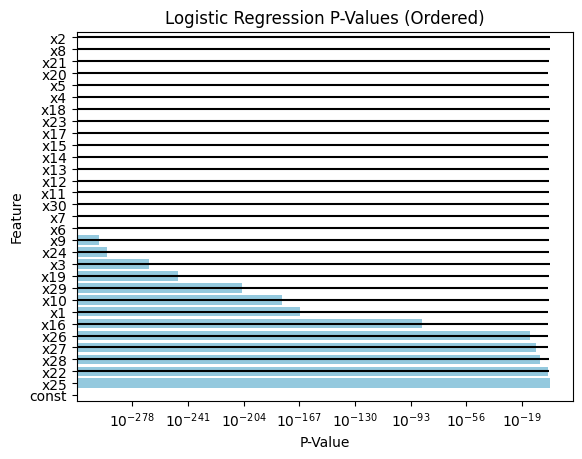

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the p-values, confidence intervals, and errors as mentioned in your code

# Create a DataFrame to store p-values and errors
p_values_df = pd.DataFrame({'p-value': p_values, 'err': errors})

# Sort the DataFrame by p-values in ascending order
p_values_df = p_values_df.sort_values(by='p-value')

# Create the bar plot
sns.barplot(data=p_values_df, y=p_values_df.index, x='p-value', xerr=p_values_df['err'], orient='h', color='skyblue')
plt.xlabel('P-Value')
plt.ylabel('Feature')
plt.title('Logistic Regression P-Values (Ordered)')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.show()


## We have determined the following features to be most significant (obfuscated)
1. v4 (0.000) 
2. x8 (0.000)
3. v11 (0.000)
4. v14 (0.000)
5. v21 (0.000)

## Then we add our non-obfuscated features
1. Time
2. Amount

In [110]:
# We extract the relevant features
X = X[['Time', 'V4', 'V8', 'V11', 'V21', 'Amount']]
X.head()

,Time,V4,V8,V11,V21,Amount
0,0.0,1.378155,0.098698,-0.551600,-0.018307,149.62
1,0.0,0.448154,0.085102,1.612727,-0.225775,2.69
2,1.0,0.379780,0.247676,0.624501,0.247998,378.66
3,1.0,-0.863291,0.377436,-0.226487,-0.108300,123.50
4,2.0,0.403034,-0.270533,-0.822843,-0.009431,69.99


In [111]:
# Retrain the model again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.172233
         Iterations 9


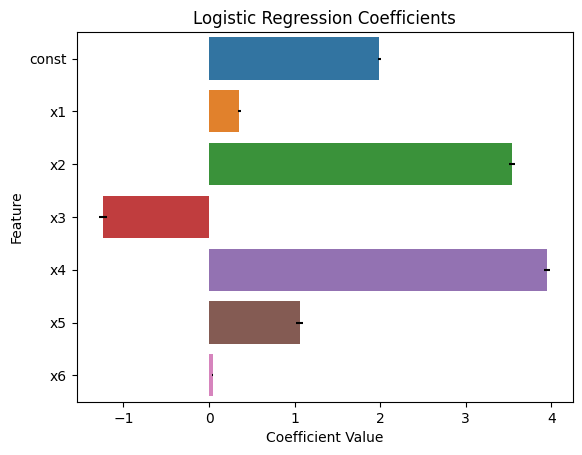

In [112]:
logit_model = model
coefficients = logit_model.params
confidence_interval = logit_model.conf_int()
errors = (confidence_interval[1] - confidence_interval[0]) / 2

coefficients_df = pd.DataFrame({'coef': coefficients, 'err': errors})

sns.barplot(data=coefficients_df, y=coefficients_df.index, x='coef', xerr=coefficients_df['err'], orient='h')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

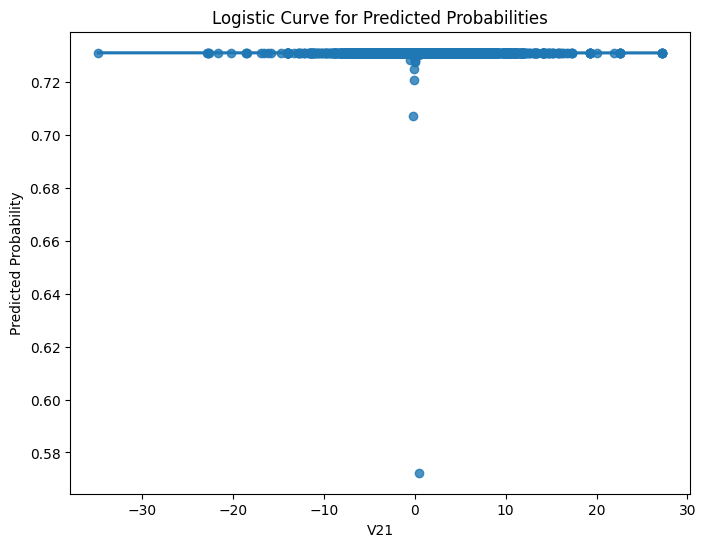

In [114]:
# Generate predicted probabilities

df['predicted_prob'] = logit_model.predict(sm.add_constant(X))

# Sort the data by the 'Amount' feature for a smooth curve
df = df.sort_values(by='Amount')

# Calculate the logistic curve
logistic_curve_x = df['V21']
logistic_curve_y = 1 / (1 + np.exp(-df['predicted_prob']))

# Plot the logistic curve
plt.figure(figsize=(8, 6))
sns.regplot(x=logistic_curve_x, y=logistic_curve_y)
plt.ylabel('Predicted Probability')
plt.title('Logistic Curve for Predicted Probabilities')
plt.show()